# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
#Load packages required for this homework
library(tidyverse);#load tidyverse
library(ggplot2); #load ggplot
# install.packages('ggpubr')#install ggpubr commented out so that it doesn't reinstall everytime
library(ggpubr);
options(warn=-1)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
setwd('C:/Users/MCT40/OneDrive - University of Pittsburgh/Classes/Spring2022/CMU_STATS/HOMEWORK/hcp_data')
d <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv') #import and call it d (because of next step)

#take a subset including specific 5 variables, and call it d1
d %>% 
    subset(select = c(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)) %>% #subset the rows
    drop_na() -> d1 #drop the NAs

head(d1)



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<int>,<int>
1,100206,2,130.42,543134,807245
2,100307,1,112.56,407292,664124
3,100408,2,121.18,500417,726206
4,100610,2,126.53,512946,762308
5,101006,1,101.85,429449,579632
6,101107,2,107.04,416995,665024


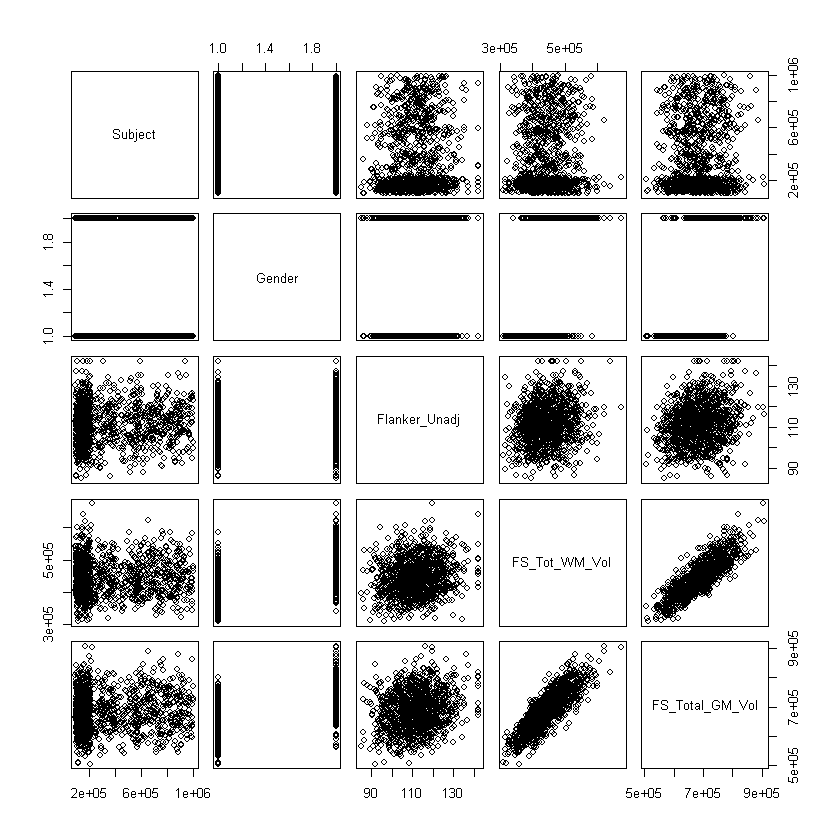

In [4]:
d1$Gender <- as.numeric(as.factor(d1$Gender)) #in order to include gender it has to be a numeric variable.
head(d1) #Female = 1, Male = 2
pairs(d1)

#reminder: total white matter volume (FS_Tot_WM_Vol), and total grey matter volume (FS_Total_GM_Vol) 


#### Observations

> Subject number: seems to not be correlated with anything (which is good since presumably it was randomly assigned). It does appeared to be skewed towards lower values, which is inconsequential. 

> Gender: Gender represented as a binary variable in this dataset. At first glance it appears females have lower distribution of values in total white matter volume and grey matter volume. This could be explained by smaller head/body size. 

> Flanker task result: These behavioural results seem to be uncorrelated with the other measures in the dataset. 

> White/Grey matter volumes: These two volumes seem to be positively and linearly correlated, which makes sense since as the number of cell bodies (grey matter) increases, so should the number of tracts that connect them (white matter)

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [3]:
#INSERT CODE
GM_Flank_lm <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, d1)
summary(GM_Flank_lm) #look at the model
coef(GM_Flank_lm) # look at the coefficients
confint(GM_Flank_lm) #look at the confidence intervals




Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


$$
Y_{flanker} = 90.26 + 3.11 X_{GM volume}
$$

> Intercept: CI [84.29, 96.22]
>
> GM volume: CI [2.24e^-05, 3.98e^-05]

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regression line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



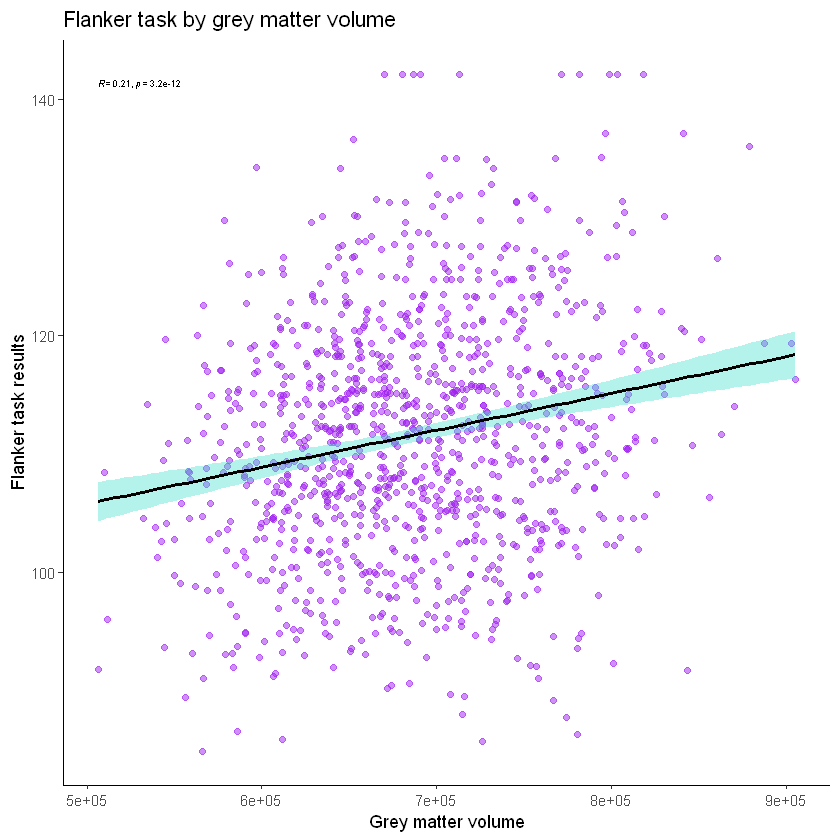

In [5]:
ggplot(d1, aes(x= FS_Total_GM_Vol, y= Flanker_Unadj)) +
  geom_point(alpha=0.5, colour= 'purple') +
  geom_smooth(method=lm, alpha= 0.4, fill='turquoise', colour='black') +
  stat_cor(method="pearson", size=2) +
  labs(title = "Flanker task by grey matter volume", y="Flanker task results", x= "Grey matter volume") +
  theme_classic()

#CI = 1.96*SE
#AS said se=TRUE is good enough

#### "Qualitatively describe what you see"
> I see a lot of data point across a wide range (lots of variability). Statistically there seems to be a weak positive correlation between grey matter volume and performance. 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> There is a slight correlation between the two variables, which indicates that as grey matter volume increase performance on the flanker task increases. However, I would be very tentative in overinterpreting these findings since the relationship is so weak and not causally linked (I believe, based on the database notes). 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Emily Goldberg, for being awesome